
# Regression models to predict property prices in Tallkrogen

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, SGDRegressor, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Call the Node Hemnet scraper which saves .json data file of sold properties in Tallkrogen
#### not needed as scraper can be called directly

In [463]:
#check_output(['npm', 'run start'])

### Read in sold property json as dataframe

In [473]:
tallkrogen_sold_prices_df = pd.read_json("../data/soldData.json", dtype={
    'address': "string",
    'soldDate': "string",
    'livingArea': int,
    'extraArea': int,
    'land': int,
    'rooms': int,
    'houseType': "string",
    'assignment': "string",
    'askingPrice': int,
    'soldPrice': int
})


In [474]:
tallkrogen_sold_prices_df.head(10)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Maratonvägen 61,2021-02-04,88,44,457,5,Villa,Äganderätt,8450000,10800000
1,Amatörvägen 2,2021-04-21,70,80,400,5,Villa,Äganderätt,7650000,10600000
2,Herrhagsvägen 88,2020-09-13,143,64,585,6,Villa,Äganderätt,7395000,8000000
3,Tallkrogsvägen 73,2019-11-09,65,65,551,5,Villa,Äganderätt,5750000,5510000
4,Tallkrogsvägen 38,2020-06-25,65,65,530,4,Villa,Äganderätt,,6350000
5,Morkullsvägen 4,2020-05-06,66,66,458,5,Villa,Äganderätt,5950000,6975000
6,Kulstötarvägen 24,2020-10-14,63,63,437,4,Villa,Äganderätt,6295000,6866000
7,Polovägen 22,2020-04-27,95,80,508,9,Villa,Äganderätt,6895000,7950000
8,Lemmingsväg 4,2018-01-23,77,77,440,4,Villa,Äganderätt,6890000,7200000
9,Rapphönsvägen 34,2020-02-14,92,43,567,4,Villa,Äganderätt,6995000,7375000


In [475]:
tallkrogen_sold_prices_df.shape

(250, 10)

In [476]:
tallkrogen_sold_prices_df.dtypes

address        object
soldDate       object
livingArea     object
extraArea      object
land           object
rooms           int64
houseType      object
assignment     object
askingPrice    object
soldPrice       int64
dtype: object

### Checking each attribute to confirm its type is accurate and cleaning any missing data

In [477]:
def checkAttribute(row): 
    try:
        str(row["address"])
    except:
        return False
    try:
        str(row["soldDate"])
    except:
        return False
    try:
        float(row["livingArea"])
    except:
        return False
    try:
        float(row["extraArea"])
    except:
        return False
    try:
        float(row["land"])
    except:
        return False
    try:
        float(row["rooms"])
    except:
        return False
    try:
        str(row["houseType"])
    except:
        return False
    try:
        str(row["assignment"])
    except:
        return False
    try:
        float(row["askingPrice"])
    except:
        return False
    try:
        float(row["soldPrice"])
    except:
        return False
    return True

In [478]:
for index, row in tallkrogen_sold_prices_df.iterrows():
    if checkAttribute(row) == False:
        tallkrogen_sold_prices_df.drop(index=index, inplace=True)

In [479]:
tallkrogen_sold_prices_df.head(10)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Maratonvägen 61,2021-02-04,88,44,457,5,Villa,Äganderätt,8450000,10800000
1,Amatörvägen 2,2021-04-21,70,80,400,5,Villa,Äganderätt,7650000,10600000
2,Herrhagsvägen 88,2020-09-13,143,64,585,6,Villa,Äganderätt,7395000,8000000
3,Tallkrogsvägen 73,2019-11-09,65,65,551,5,Villa,Äganderätt,5750000,5510000
5,Morkullsvägen 4,2020-05-06,66,66,458,5,Villa,Äganderätt,5950000,6975000
6,Kulstötarvägen 24,2020-10-14,63,63,437,4,Villa,Äganderätt,6295000,6866000
7,Polovägen 22,2020-04-27,95,80,508,9,Villa,Äganderätt,6895000,7950000
8,Lemmingsväg 4,2018-01-23,77,77,440,4,Villa,Äganderätt,6890000,7200000
9,Rapphönsvägen 34,2020-02-14,92,43,567,4,Villa,Äganderätt,6995000,7375000
10,Träningsvägen 28,2020-06-10,65,73,502,6,Villa,Äganderätt,6450000,7425000


In [480]:
tallkrogen_sold_prices_df.shape

(239, 10)

In [481]:
tallkrogen_sold_prices_df["houseType"].unique()
tallkrogen_sold_prices_df = tallkrogen_sold_prices_df.drop("houseType", axis=1)

### casting the soldDate attribute to pandas datetime

In [482]:
tallkrogen_sold_prices_df['soldDate'] = pd.to_datetime(tallkrogen_sold_prices_df['soldDate'])

In [483]:
tallkrogen_sold_prices_df.head(10)

,address,soldDate,livingArea,extraArea,land,rooms,assignment,askingPrice,soldPrice
0,Maratonvägen 61,2021-02-04,88,44,457,5,Äganderätt,8450000,10800000
1,Amatörvägen 2,2021-04-21,70,80,400,5,Äganderätt,7650000,10600000
2,Herrhagsvägen 88,2020-09-13,143,64,585,6,Äganderätt,7395000,8000000
3,Tallkrogsvägen 73,2019-11-09,65,65,551,5,Äganderätt,5750000,5510000
5,Morkullsvägen 4,2020-05-06,66,66,458,5,Äganderätt,5950000,6975000
6,Kulstötarvägen 24,2020-10-14,63,63,437,4,Äganderätt,6295000,6866000
7,Polovägen 22,2020-04-27,95,80,508,9,Äganderätt,6895000,7950000
8,Lemmingsväg 4,2018-01-23,77,77,440,4,Äganderätt,6890000,7200000
9,Rapphönsvägen 34,2020-02-14,92,43,567,4,Äganderätt,6995000,7375000
10,Träningsvägen 28,2020-06-10,65,73,502,6,Äganderätt,6450000,7425000


In [484]:
tallkrogen_sold_prices_df["soldDate"]

0     2021-02-04
1     2021-04-21
2     2020-09-13
3     2019-11-09
5     2020-05-06
         ...    
245   2013-11-28
246   2022-06-22
247   2018-08-22
248   2015-04-16
249   2015-05-26
Name: soldDate, Length: 239, dtype: datetime64[ns]

### Assingment attribute is either Äganderätt or Tomträtt. As this are categorical datum, we label this numerically,  with Äganderätt being 1 and Tomträtt being 0. This is added in a new attribute named assignment_num

In [485]:
def assignment_to_number(df):
    assignment_dict = {"Äganderätt": 1, "Tomträtt": 0}
    df['assignment_num'] = df['assignment']
    df['assignment_num'].replace(assignment_dict, inplace=True)

In [486]:
assignment_to_number(tallkrogen_sold_prices_df)
tallkrogen_sold_prices_df.head()

,address,soldDate,livingArea,extraArea,land,rooms,assignment,askingPrice,soldPrice,assignment_num
0,Maratonvägen 61,2021-02-04,88,44,457,5,Äganderätt,8450000,10800000,1
1,Amatörvägen 2,2021-04-21,70,80,400,5,Äganderätt,7650000,10600000,1
2,Herrhagsvägen 88,2020-09-13,143,64,585,6,Äganderätt,7395000,8000000,1
3,Tallkrogsvägen 73,2019-11-09,65,65,551,5,Äganderätt,5750000,5510000,1
5,Morkullsvägen 4,2020-05-06,66,66,458,5,Äganderätt,5950000,6975000,1


### Scatter plot of sold date and price
We can clearly see a linear link between sold date and price

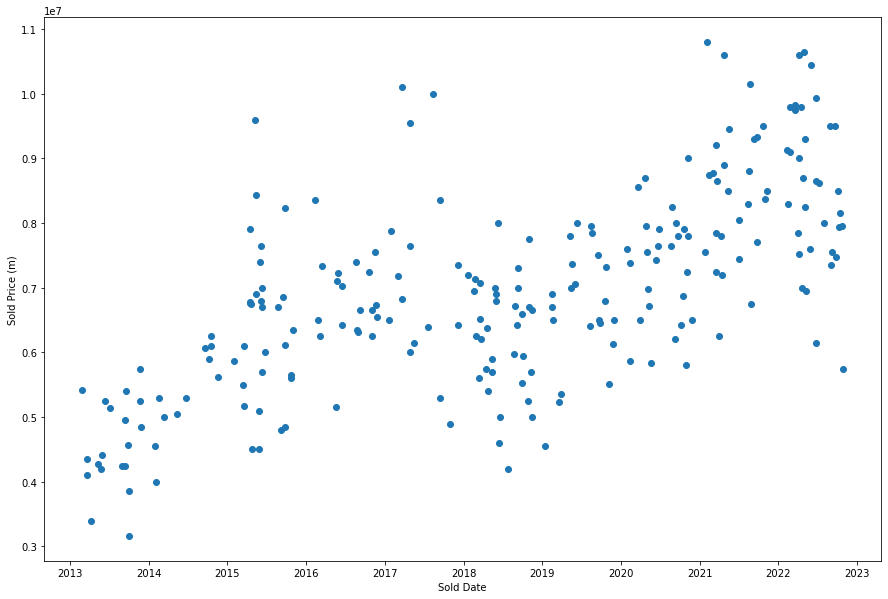

In [491]:
plt.subplots(figsize=(15,10))
plt.scatter(tallkrogen_sold_prices_df['soldDate'], tallkrogen_sold_prices_df['soldPrice'])
plt.xlabel("Sold Date")
plt.ylabel("Sold Price (m)")
plt.show()

### Creating a new attribute price per sq meter, which is sold price divided by living area and extra area.

In [492]:
tallkrogen_sold_prices_df["price_per_sq_meter"] = tallkrogen_sold_prices_df["soldPrice"].astype(int) / (tallkrogen_sold_prices_df["livingArea"].astype(int) + (tallkrogen_sold_prices_df["extraArea"].astype(int)))

In [493]:
tallkrogen_sold_prices_df["soldPrice"].astype(int)

0      10800000
1      10600000
2       8000000
3       5510000
5       6975000
         ...   
245     4850000
246     6150000
247     5972000
248     7900000
249     5100000
Name: soldPrice, Length: 239, dtype: int64

In [494]:
tallkrogen_sold_prices_df.head()

,address,soldDate,livingArea,extraArea,land,rooms,assignment,askingPrice,soldPrice,assignment_num,price_per_sq_meter
0,Maratonvägen 61,2021-02-04,88,44,457,5,Äganderätt,8450000,10800000,1,81818.181818
1,Amatörvägen 2,2021-04-21,70,80,400,5,Äganderätt,7650000,10600000,1,70666.666667
2,Herrhagsvägen 88,2020-09-13,143,64,585,6,Äganderätt,7395000,8000000,1,38647.342995
3,Tallkrogsvägen 73,2019-11-09,65,65,551,5,Äganderätt,5750000,5510000,1,42384.615385
5,Morkullsvägen 4,2020-05-06,66,66,458,5,Äganderätt,5950000,6975000,1,52840.909091


In [495]:
tallkrogen_sold_prices_df["askingPrice"] = tallkrogen_sold_prices_df["askingPrice"].astype(int)

In [497]:
tallkrogen_sold_prices_df[tallkrogen_sold_prices_df["soldPrice"] < tallkrogen_sold_prices_df["askingPrice"]]

,address,soldDate,livingArea,extraArea,land,rooms,assignment,askingPrice,soldPrice,assignment_num,price_per_sq_meter
3,Tallkrogsvägen 73,2019-11-09,65,65,551,5,Äganderätt,5750000,5510000,1,42384.615385
14,Kulstötarvägen 45,2017-07-19,68,62,459,5,Äganderätt,6500000,6400000,1,49230.769231
26,Tallkrogsvägen 75,2017-12-05,102,111,551,6,Äganderätt,7500000,7350000,1,34507.042254
33,Tallkrogsvägen 57,2017-11-01,65,65,551,6,Äganderätt,5010000,4900000,1,37692.307692
43,Olympiavägen 47,2017-09-12,51,51,326,5,Äganderätt,5400000,5300000,1,51960.784314
69,Torögatan 69,2020-05-08,93,101,495,7,Tomträtt,6950000,6720000,0,34639.175258
81,Lemmingsväg 23,2015-09-09,67,60,582,4,Äganderätt,4975000,4800000,1,37795.275591
83,Krokvägen 127,2022-06-22,80,72,575,6,Äganderätt,9975000,9935000,1,65361.842105
113,Maratonvägen 22,2021-08-12,66,66,537,5,Äganderätt,8750000,8300000,1,62878.787879
127,Fasanvägen 7,2019-03-19,65,62,602,4,Äganderätt,5495000,5230000,1,41181.102362


### Scatter plot of sold date and price per sq meter
We can clearly see a linear regression between sold date and price per sq meter

Text(0, 0.5, 'Price per Square Meter (SEK)')

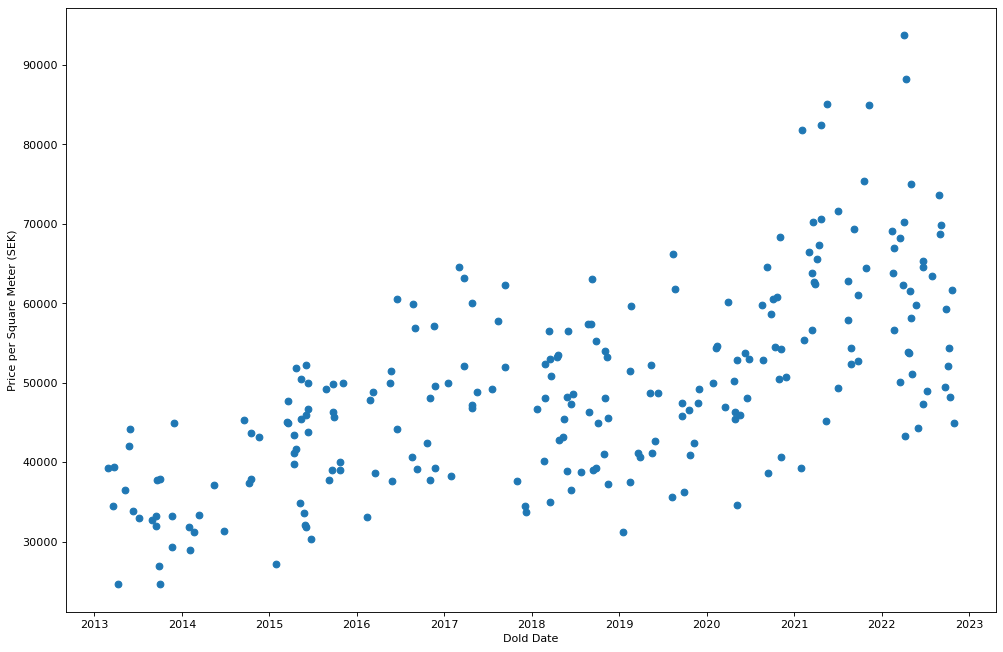

In [499]:
plt.figure(figsize=(15,10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldDate"], y=tallkrogen_sold_prices_df["price_per_sq_meter"])
plt.xlabel("Dold Date")
plt.ylabel("Price per Square Meter (SEK)")

### Adding new attribute of sold year so it can be used to create models

In [500]:
tallkrogen_sold_prices_df["soldYear"] = tallkrogen_sold_prices_df["soldDate"].dt.year


## Regression Models

### Helper function to build and train models 

In [501]:
def build_and_train_model(data, target_name, unreq_cols, fn):
    
    drop_cols = [target_name, *unreq_cols] 
    
    X = data.drop(drop_cols, axis=1)
    Y = data[target_name]
    
    x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size = 0.2, random_state=0)

    model = fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred
           }

### Linear Regression

In [118]:
def linear_model(x_train, y_train):
    
    print("Linear Regression")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    
    return linear_regression

In [119]:
linear_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment", "askingPrice"], linear_model)

Linear Regression
Training Score :  0.9515554687935153
Testing Score :  0.9643887040176726


### Lasso Regression


In [120]:
def lasso_model(x_train, y_train):
    
    print("Lasso Regression")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    
    lasso_regression.fit(x_train, y_train)
    
    return lasso_regression

In [121]:
lasso_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment", "askingPrice"], lasso_model)

Lasso Regression
Training Score :  0.951555468788707
Testing Score :  0.9643887655606616


### Ridge Regression


In [122]:
def ridge_model(x_train, y_train):
    
    print("Ridge Regression")
    ridge_regression = Ridge(alpha=0.9)
    
    ridge_regression.fit(x_train, y_train)
    
    return ridge_regression

In [123]:
ridge_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment", "askingPrice"], ridge_model)

Ridge Regression
Training Score :  0.9515554140140451
Testing Score :  0.9643894393024477


### Random Forest Regression


In [124]:
def random_forest_model(x_train, y_train):
    
    print("Random Forest Regression")
    randon_forest_regression = RandomForestRegressor(max_depth=2, random_state=0)
    
    randon_forest_regression.fit(x_train, y_train)
    
    return randon_forest_regression


In [125]:
random_forest_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment", "askingPrice"], random_forest_model)

Random Forest Regression
Training Score :  0.6347356226670726
Testing Score :  0.5092901620153087


###  Stochastic Gradient Descent Regression

In [229]:
def sgd_model(x_train, y_train):
    
    print("SGD Regression")
    sgd_regression = SGDRegressor(max_iter=3000)
    
    sgd_regression.fit(x_train, y_train)
    
    return sgd_regression

In [230]:
sgd_reg = build_and_train_model(tallkrogen_sold_prices_df, "soldPrice", ["address", "soldDate", "assignment", "askingPrice"], sgd_model)

SGD Regression
Training Score :  -6.0639297488359166e+22
Testing Score :  -4.6633753494737436e+22


## Read in the for sale properties into dataframe

In [503]:
tallkrogen_for_sale_df = pd.read_json("../data/forSaleData.json", dtype={
    'address': "string",
    'livingArea': int,
    'extraArea': int,
    'land': int,
    'rooms': int,
    'houseType': "string",
    'assignment_num': int,
    'askingPrice': int,
    'forSaleYear': int
})

In [504]:
tallkrogen_for_sale_df.head()

,address,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,forSaleYear
0,Olympiavägen 65,63,60,331,6,Villa,Äganderätt,6950000,2022
1,Mörkövägen 70,66,62,493,5,Villa,Äganderätt,7300000,2022
2,Rörsoppsvägen 32,107,107,554,7,Villa,Äganderätt,8995000,2022


### Drop cols not needed and rearrange column order and add price per sq meter col to get ready to predict on

In [505]:
tallkrogen_for_sale_predict_df = tallkrogen_for_sale_df.drop(["address", "houseType"], axis=1)

In [506]:
tallkrogen_for_sale_predict_df["price_per_sq_meter"] = tallkrogen_for_sale_predict_df["askingPrice"].astype(int) / (tallkrogen_for_sale_predict_df["livingArea"].astype(int) + (tallkrogen_for_sale_predict_df["extraArea"].astype(int)))

In [507]:
assignment_to_number(tallkrogen_for_sale_predict_df)

In [508]:
tallkrogen_for_sale_predict_df = tallkrogen_for_sale_predict_df[['livingArea', 'extraArea', 'land', 'rooms', 'assignment_num', 'price_per_sq_meter', 'forSaleYear']]

In [509]:
tallkrogen_for_sale_predict_df

,livingArea,extraArea,land,rooms,assignment_num,price_per_sq_meter,forSaleYear
0,63,60,331,6,1,56504.065041,2022
1,66,62,493,5,1,57031.250000,2022
2,107,107,554,7,1,42032.710280,2022


## Predictions

In [510]:
models = ["linear", "lasso", "ridge", "random_forest"]
for index, row in tallkrogen_for_sale_predict_df.iterrows():
    for model in models:
        tallkrogen_for_sale_df.loc[index, f"{model}_prediction"] = int(eval(f"{model}_reg")["model"].predict([row]))

### Make prediction based on properties for sale

In [511]:
tallkrogen_for_sale_df['mean_prediction'] = (tallkrogen_for_sale_df["linear_prediction"] + 
                                            tallkrogen_for_sale_df["lasso_prediction"] +
                                            tallkrogen_for_sale_df["ridge_prediction"] +
                                            tallkrogen_for_sale_df["random_forest_prediction"]) / 4

In [512]:
tallkrogen_for_sale_df

,address,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,forSaleYear,linear_prediction,lasso_prediction,ridge_prediction,random_forest_prediction,mean_prediction
0,Olympiavägen 65,63,60,331,6,Villa,Äganderätt,6950000,2022,7163581.0,7163583.0,7163401.0,7952391.0,7360739.00
1,Mörkövägen 70,66,62,493,5,Villa,Äganderätt,7300000,2022,7349136.0,7349139.0,7349247.0,8056725.0,7526061.75
2,Rörsoppsvägen 32,107,107,554,7,Villa,Äganderätt,8995000,2022,9086161.0,9086162.0,9085918.0,8239902.0,8874535.75


In [513]:
for index, row in tallkrogen_for_sale_df.iterrows():
    print(f"Address: {row['address']} with an asking price of {row['askingPrice']} SEK, I predict will sell for: {row['mean_prediction']} SEK.\n" 
          f"This is a {round(((row['mean_prediction'] / row['askingPrice']) * 100)-100, 1)}% difference from asking price\n\n")

Address: Olympiavägen 65 with an asking price of 6950000 SEK, I predict will sell for: 7360739.0 SEK.
This is a 5.9% difference from asking price


Address: Mörkövägen 70 with an asking price of 7300000 SEK, I predict will sell for: 7526061.75 SEK.
This is a 3.1% difference from asking price


Address: Rörsoppsvägen 32 with an asking price of 8995000 SEK, I predict will sell for: 8874535.75 SEK.
This is a -1.3% difference from asking price


